# Credit Card Fraud Detection


## Understanding the problem

Detecting credit card fraud is a critical application of predictive analysis in the financial industry.
The main objective of credit card fraud detection is to identify any fraudulent transactions in real-time 
before they are authorized and processed. 

To accomplish this, a variety of statistical modeling and machine learning techniques can be employed. 
One common method is to use supervised learning algorithms, such as decision trees, random forests, or logistic regression. 
These algorithms are trained on labeled datasets of credit card transactions that are categorized as either fraudulent
or legitimate. 

Unsupervised learning techniques, such as clustering or anomaly detection, can also be utilized to group similar transactions or detect unusual patterns.

In addition to these methods, feature engineering, which involves selecting and engineering relevant transaction data, can improve the accuracy of predictive models. Even though credit card fraud detection is a challenging problem due to the large number of transactions and dynamic nature of fraud patterns, effective fraud detection systems can be built using the appropriate data and modeling techniques to help reduce financial losses and safeguard customers from fraud.


So for this data science project, I will predict the credit card fraud in the transactional dataset using some of the predictive models. 


### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset under consideration exclusively includes numerical input variables resulting from a PCA transformation. Unfortunately, no additional information on the original features and related background are provided due to confidentiality constraints. The dataset features consist of the principal components V1 through V28 derived from PCA transformation, while 'Time' and 'Amount' are the only features that have not undergone this process. The 'Time' feature reflects the time difference in seconds between a transaction and the first transaction recorded in the dataset. The 'Amount' feature indicates the monetary value of the transaction and could be utilized for instance-specific cost-sensitive learning. The 'Class' feature serves as the response variable, with a value of 1 indicating fraud and 0 denoting otherwise.

## Importing data and learning its structure

In [1]:
!pip install imblearn
!pip install mkl numpy seaborn
!pip install imbalanced-learn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 50.8 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np
import pandas as pd
import time
import os


#plotting 
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

import seaborn as sns


In [3]:
os.listdir('/kaggle/input/')
#To read csv File from locally stored file
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Credit Card Fraud Detection data Information", "rows:" ,df.shape[0], " coulmns :" , df.shape[1])
df.info()


In [ ]:
#check if any null values
df.isnull().sum() 

In [ ]:
df.describe()

## Scaling different variables 

In credit card datasets, it is common to have variables with different scales. 
The 'Amount'  variable, which represents the monetary value of a transaction, have values ranging from a few cents to several thousand dollars.

Amount Min: 0 dollar Max: 25691.160000 dollar   75% of amount is 77.165 dollar and 50% : 22 dollar with a mean of 88.349619 

'Time' variable indicates the number of seconds elapsed since the first transaction in the dataset.

Time  : Min: 0 sec Max: 172792 (2day)  75% of amount is 139320sec and 50% : 84692s

To deal with these differences in scale, we need to apply feature scaling techniques to the dataset before using it for modeling. One common technique is standardization, which involves subtracting the mean of each variable and dividing by its standard deviation. Another technique is normalization, which scales each variable to have a minimum value of 0 and a maximum value of 1.
It is important to note that when applying scaling techniques, it is crucial to only fit the scaler on the training set and apply the same transformation on the test set to avoid data leakage. Additionally, scaling should be performed after splitting the data into training and testing sets to avoid introducing bias in the evaluation of the model performance.

In summary, applying feature scaling techniques to credit card datasets can help to ensure that all variables are equally important during modeling, and can prevent bias in the model evaluation process.

# Data imbalance

In [ ]:
# Data imbalance
class_count=df['Class'].value_counts()
class_count
print("Fraudulent:" , class_count[1]/df['Class'].count()*100)
print("Non-Fraudulent:" , class_count[0]/df['Class'].count()*100)

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(10,5))
df['Class'].value_counts().plot(kind='bar')
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()



Only 492 i.e. only  0.172%  of transaction are fraudulent ; data is highly unbalanced 

NearMiss and SMOTE are two commonly used techniques for addressing imbalanced datasets by either undersampling the majority class or oversampling the minority class.

NearMiss is an undersampling technique that aims to balance the class distribution by selecting examples from the majority class that are closest to the minority class. There are three versions of the NearMiss algorithm: NearMiss-1, NearMiss-2, and NearMiss-3. Each version selects different samples from the majority class based on their distance to the minority class.


In [4]:
## NearMiss
# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']
# Apply the NearMiss algorithm to the dataset
nm = NearMiss(version=2)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Original dataset shape:', y.shape)
print('Resampled dataset shape:', y_resampled_nm.shape)
print('Class distribution before resampling:\n', y.value_counts())
print('Class distribution after resampling:\n', y_resampled_nm.value_counts())

Original dataset shape: (284807,)
Resampled dataset shape: (984,)
Class distribution before resampling:
 0    284315
1       492
Name: Class, dtype: int64
Class distribution after resampling:
 0    492
1    492
Name: Class, dtype: int64


Conclusion : I apply the NearMiss algorithm with version 2 to the dataset, which selects samples from the majority class that are closest to the minority class. Additionally, we need to evaluate the performance of the model on the resampled data to ensure that the classification accuracy and other metrics are satisfactory.

SMOTE is an oversampling technique that creates synthetic samples in the minority class by interpolating new samples between existing ones. The synthetic samples are created by randomly selecting a minority class example and generating new samples by interpolating between it and its k-nearest neighbors. This technique has several variations, such as Borderline-SMOTE, ADASYN, and SMOTE-ENN, that aim to improve its effectiveness.



In [6]:
# Apply the SMOTE algorithm to the dataset
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Original dataset shape:', y.shape)
print('Resampled dataset shape:', y_resampled_smote.shape)
print('Class distribution before resampling:\n', y.value_counts())
print('Class distribution after resampling:\n', y_resampled_smote.value_counts())

Original dataset shape: (284807,)
Resampled dataset shape: (568630,)
Class distribution before resampling:
 0    284315
1       492
Name: Class, dtype: int64
Class distribution after resampling:
 0    284315
1    284315
Name: Class, dtype: int64


This seems not to be  agood approch as we are artifically oversampling our test data too. We should only do the train data smoting and leave the validation and test data as it is. It is done in the next part off the code. But the way we do smpting us correct. 

Conclusion : I apply SMOTE algorithm to the dataset with a random state of 42, which generates synthetic samples for the minority class by interpolating between existing samples. Moreover to evaluate the performance of the model on the resampled data we need to ensure that the classification accuracy and other metrics are satisfactory.

## Outlier detection

Detecting outliers is important as fraudulent transactions can be significantly different from legitimate ones, and these differences can be used to identify outliers. One commonly used method for detecting outliers is the Z-score method, which calculates the number of standard deviations that a data point is from the mean. Data points that are more than a certain number of standard deviations away from the mean are considered outliers.

In [ ]:
# Calculate the Z-score for each feature
z_scores = np.abs((df - df.mean()) / df.std())

# Set the threshold for outliers
#threshold = 3

# Identify the outliers
#outliers = np.where(z_scores > threshold)

# Print the outliers
#print('Outliers:', outliers)


df['z_score'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Split the data into fraudulent and non-fraudulent transactions
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Plot the Z-scores for fraudulent and non-fraudulent transactions
plt.figure(figsize=(4, 2))
#plt.hist(non_fraud_df['z_score'], bins=50, alpha=0.5, label='Non-Fraudulent')
plt.hist(fraud_df['z_score'], bins=50, alpha=0.5, label='Fraudulent')
plt.axvline(x=2, color='red', linestyle='--')
plt.axvline(x=-2, color='red', linestyle='--')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Card Transactions by Z-Score')
plt.legend()
plt.show()

Other is Numeric Outlier a nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the InterQuartile Range (IQR).

The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point xi that lies outside the interquartile range. That is:
xi>Q3+k(IQR)∨xi<Q1−k(IQR)
where  IQR=Q3−Q1  and  k≥0

Using the interquartile multiplier value k=1.5, the range limits are the typical upper and lower whiskers of a box plot.

In [ ]:

plt.figure(figsize=(4, 2))
sns.boxplot(x='Class', y='Amount', data=df)
# Set the y-axis scale to logarithmic
sns.set(style='ticks')
sns.despine()
plt.yscale('log')

# Add labels to the axes
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Amount (Log Scale)')

# Show the plot
plt.show()

In [9]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
target = 'Class'
Xval = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Amount']


train_df, test_df =  train_test_split(df, test_size=0.20, random_state=100, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=100, shuffle=True )

print(len(train_df),len(test_df),len(valid_df))


182276 56962 45569


We divide  dataset into train, test, and validation sets to evaluate the performance of a machine learning model.

The train set is used to train the model. The model learns from the input data and the output labels in the train set, adjusting its parameters to minimize the error between the predicted output and the actual output.

The test set is used to evaluate the performance of the trained model. The model makes predictions on the input data in the test set, and the accuracy of its predictions is compared to the actual output labels in the test set.

The validation set is used to tune the model's hyperparameters. Hyperparameters are the parameters that are set before training the model, such as the learning rate, regularization strength, and number of hidden layers. The validation set is used to evaluate different sets of hyperparameters and choose the one that results in the best performance on the validation set.

By dividing the dataset into these three sets, we can ensure that the model does not overfit to the training data, and that its performance is generalizable to new, unseen data.

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rfc = RandomForestClassifier(n_jobs=4, 
                             random_state=42,
                             #criterion=RFC_METRIC,
                             n_estimators=100,
                             verbose=False)
rfc.fit(train_df[Xval], train_df[target].values)


In [ ]:
#rfc_score = rfc.score(test_df[Xval],test_df[target])
rfc_pred = rfc.predict(valid_df[Xval])

In [ ]:
plt.figure(figsize=(6, 2))
fimp = rfc.feature_importances_
indices = np.argsort(fimp)[::-1]
sorted_features = np.array([Xval[i] for i in range(len(Xval))])[indices]

#plot sorted feature importance
plt.bar(sorted_features, fimp[indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()


## Metrics performance 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(valid_df[target],rfc_pred)

# plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#precision = true positives / (true positives + false positives)

print(classification_report(valid_df[target].values, rfc_pred))

So a fraud transcation in a credit card detection  has a precision rate of 0.94, recall rate of 0.80 and F1 scoce of 0.86

In [ ]:
roc_auc_score(valid_df[target].values, rfc_pred)

ROC value is 0.897 . ROC AUC score is a measure of the classifier's ability to distinguish between the positive and negative classes, based on the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). It evaluates the classifier's performance on the test data, by comparing the predicted probabilities or scores of the classifier with the true labels.

a confusion matrix provides a summary of the model's performance such as accuracy, precision, recall, and F1-score, while a ROC curve provides a visual representation of the model's sensitivity and specificity trade-off at different classification thresholds TPR vs FPR. Both tools are useful for evaluating binary classification models, and they can be used in combination to gain a more comprehensive understanding of the model's performance.

# Using various model , training, predicting and evaluating metrics

In [10]:
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, recall_score, f1_score,confusion_matrix, classification_report
def evaluate_metrics(y_test,y_pred):
    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    #classification = classification_report(y_test, y_pred)
    print("Accuracy:  {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format( f1))
    print("ROC : {:.3f}".format(roc))
    #print("Classification_report :")
    #print(classification)    
    #return(accuracy,precision,recall,f1,roc,classification)
    return(accuracy,precision,recall,f1,roc)



# plot the confusion matrix as a heatmap
def Plot_confusion_matrix(y_test, y_pred):
  plt.figure(figsize=(3,3))  
  cm = confusion_matrix(y_test, y_pred)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')  
  classNames = ['NonFraud','Fraud']
  plt.title('Confusion Matrix ')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=0,ha='left')
  plt.yticks(tick_marks, classNames,rotation=90, ha='left')
  s = [['TN','FP'], ['FN', 'TP']]
  plt.show()
  #for i in range(2):
  #    for j in range(2):
  #        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  #plt.show()
    
def impfeatures(model):
    plt.figure(figsize=(6,3)) 
    fimp = model.feature_importances_
    indices = np.argsort(fimp)[::-1]
    sorted_features = np.array([Xval[i] for i in range(len(Xval))])[indices]

    #plot sorted feature importance
    plt.bar(sorted_features, fimp[indices])
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.show()

In [ ]:
!pip install xgboost
!pip install catboost

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
df_metric = pd.DataFrame(columns=['modelname','acc', 'prec', 'recall', 'f1', 'roc'])
models = {
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "LogisticRegression" : LogisticRegression(),
    #"Support Vector Machhine" : SVC(),
    "k-Nearest Neighbour "    :  KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False)
}
#more_models_to_add={
#    ""
    
#}

In [ ]:
for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(train_df[Xval],train_df[target].values)
    y_pred_model = model.predict(valid_df[Xval])
    y_test_model = valid_df[target]
    
    print("Model Performance for the ",list(models.keys())[i])
    acc,prec,recall,f1,roc = evaluate_metrics(y_test_model,y_pred_model)
    row = {'modelname' : list(models.keys())[i], 'acc': acc, 'prec': prec, 'recall': recall, 'f1': f1, 'roc': roc}
    df_metrics= df_metrics.append(row,ignore_index=True)
    #impfeatures(model)
    Plot_confusion_matrix(y_test_model,y_pred_model)
    print("---------------------------------------")

In [ ]:
df_metric

In this case, credit card fraud data the metric of intrest would be roc score with f1, precision and recall score. The accuracy here doesn't matter as the data is highly imbalance and accuracy score will highy be impacted by the dominated class. So considering all facts it seems Random Forest and XGBoost seems to be a good approach to move ahead and we can try out result with RandomForest ensemble and tuning some of the hyperparameters

# SMOTE 

In [22]:
smote = SMOTE(random_state=42)

train_df, test_df =  train_test_split(df, test_size=0.20, random_state=100, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=100, shuffle=True )
print(len(train_df),len(test_df),len(valid_df))

X_resampled_smote, y_resampled_smote = smote.fit_resample(train_df[Xval],train_df[target].values)
print(len(X_resampled_smote) ,len(y_resampled_smote))
#train_df= pd.concat([pd.DataFrame(X_resampled_smote), pd.DataFrame(y_resampled_smote)], axis=1)

182276 56962 45569
363926 363926


In [ ]:
for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(train_df[Xval],train_df[target].values)
    y_pred_model = model.predict(valid_df[Xval])
    y_test_model = valid_df[target]
    
    print("Model Performance for the ",list(models.keys())[i])
    acc,prec,recall,f1,roc = evaluate_metrics(y_test_model,y_pred_model)
    row = {'modelname' : list(models.keys())[i], 'acc': acc, 'prec': prec, 'recall': recall, 'f1': f1, 'roc': roc}
    df_metric= df_metric.append(row,ignore_index=True)
    #impfeatures(model)
    Plot_confusion_matrix(y_test_model,y_pred_model)
    print("---------------------------------------")

Model Performance for the  Decision Tree
Accuracy:  0.998
Precision: 0.997
Recall: 0.999
F1 Score: 0.998
ROC : 0.998


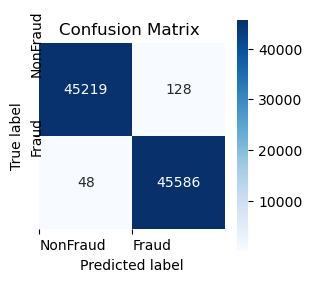

---------------------------------------
Model Performance for the  Random Forest
Accuracy:  1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC : 1.000


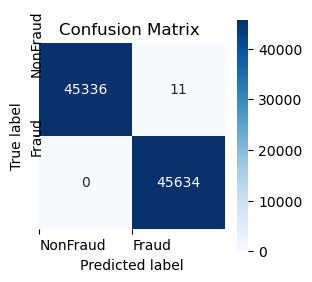

---------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model Performance for the  LogisticRegression
Accuracy:  0.974
Precision: 0.983
Recall: 0.965
F1 Score: 0.974
ROC : 0.974


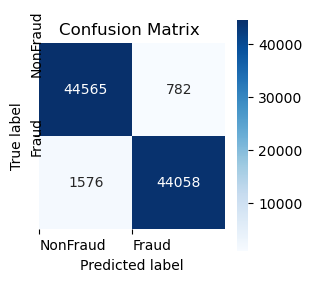

---------------------------------------
Model Performance for the  k-Nearest Neighbour 
Accuracy:  0.957
Precision: 0.943
Recall: 0.972
F1 Score: 0.958
ROC : 0.957


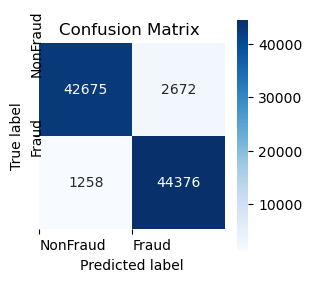

---------------------------------------
Model Performance for the  Gradient Boosting
Accuracy:  0.987
Precision: 0.994
Recall: 0.981
F1 Score: 0.987
ROC : 0.987


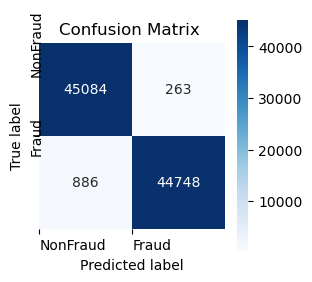

---------------------------------------
Model Performance for the  XGBClassifier
Accuracy:  1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
ROC : 1.000


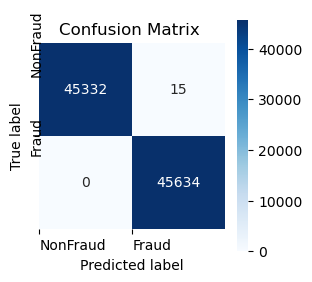

---------------------------------------
Model Performance for the  AdaBoost Classifier
Accuracy:  0.982
Precision: 0.989
Recall: 0.975
F1 Score: 0.982
ROC : 0.982


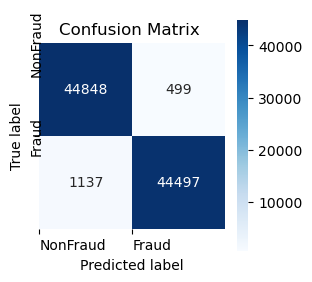

---------------------------------------
Model Performance for the  CatBoosting Classifier
Accuracy:  1.000
Precision: 0.999
Recall: 1.000
F1 Score: 1.000
ROC : 1.000


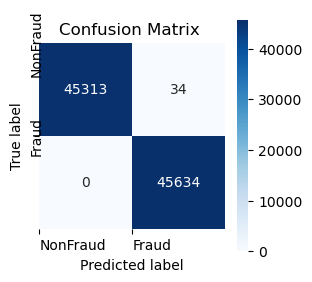

---------------------------------------


In [13]:
for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(train_df[Xval],train_df[target].values)
    y_pred_model = model.predict(valid_df[Xval])
    y_test_model = valid_df[target]
    
    print("Model Performance for the ",list(models.keys())[i])
    acc,prec,recall,f1,roc = evaluate_metrics(y_test_model,y_pred_model)
    row = {'modelname' : list(models.keys())[i], 'acc': acc, 'prec': prec, 'recall': recall, 'f1': f1, 'roc': roc}
    df_metric= df_metric.append(row,ignore_index=True)
    #impfeatures(model)
    Plot_confusion_matrix(y_test_model,y_pred_model)
    print("---------------------------------------")

In [ ]:
df_metric

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

### Cross validation in the context of undersampling and oversampling

The cross-validation score is a measure of the classifier's performance on the training data, as estimated by the cross-validation procedure. It provides an estimate of the classifier's ability to generalize to new, unseen data, by evaluating its performance on multiple subsamples of the training data.

The difference between the cross-validation score and the ROC AUC score can occur due to several reasons. One possible reason is overfitting, where the classifier performs well on the training data but poorly on the test data. In such cases, the cross-validation score may be higher than the ROC AUC score, as the cross-validation estimates the performance of the classifier on the training data only, while the ROC AUC score reflects its performance on the unseen test data.

Another reason for the difference could be the imbalance of the dataset, where the minority class is underrepresented. In such cases, the ROC AUC score may be a more reliable measure of the classifier's performance, as it takes into account the trade-off between sensitivity and specificity on the imbalanced data. However, the cross-validation score can still provide useful information about the classifier's ability to generalize to new, unseen data.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=2, random_state=42, shuffle=True)
#scores = cross_val_score(rfc, train_df[Xval], train_df[target], cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1, 
                         #fit_params={'sample_weight': smote.fit_resample(df[Xval], df[target])[1]})

In [ ]:
print("Average ROC AUC score: {:.3f}".format(scores.mean()))

# Ensemble technique: Random Forest

Random Forest Classifier using GridSearchCV or other hyperparameter tuning techniques can optimize the Random Forest model's hyperparameters and improve its performance. GridSearchCV is a technique for hyperparameter tuning that systematically tests different combinations of hyperparameters to find the optimal combination that maximizes a performance metric such as accuracy or F1-score. By using GridSearchCV, we can tune the number of trees, the maximum depth of the trees, and other hyperparameters to improve the model's accuracy and reduce overfitting


StratifiedKFold is used for evaluating the performance of a machine learning model, while GridSearchCV is used for hyperparameter tuning to improve the performance of a model.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a Random Forest Classifier object
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1-score
print('Best hyperparameters:', grid_search.best_params_)
print('Best F1-score:', grid_search.best_score_)

# Evaluate the performance of the model on the testing set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
acc,prec,recall,f1,roc = evaluate_metrics(y_test,y_pred)

In [ ]:
row = {'modelname' : 'RFEnsemble', 'acc': 1.000, 'prec': 0.974, 'recall': 0.776, 'f1': 0.864, 'roc': 0.888 }
df_metrics= df_metrics.append(row,ignore_index=True)

# Logistic regression 

Logistic regression can be a useful tool for credit card fraud detection. It is popular classification algorithm that models the probability of a binary outcome (in this case, fraud or not fraud) based on a set of predictor variables (in this case, features of the credit card transaction). It can handle both linear and nonlinear relationships between the features and the outcome. This model is relatively simple and interpretable model, which can make it easier to understand the factors that contribute to fraud. It is also computationally efficient, which can be important for handling large datasets.   It assumes that the relationship between the features and the outcome is linear, which may not always be the case. It can also be sensitive to outliers or skewed distributions in the data. Additionally, logistic regression may not be as effective as other machine learning algorithms, such as decision trees or random forests, in handling complex or nonlinear relationships between the features and the outcome.

L1 and L2 regularization are techniques used in machine learning to prevent overfitting by adding a penalty term to the loss function of the model. The penalty term encourages the model to have smaller weights or coefficients, which can help to prevent overfitting.

L1 regularization, also known as Lasso regularization, adds a penalty term to the loss function that is proportional to the absolute value of the weights. The effect of this penalty term is to encourage the model to have sparse weights, meaning that some of the weights may be set to zero. This can help to select the most important features and reduce the complexity of the model.

L2 regularization, also known as Ridge regularization, adds a penalty term to the loss function that is proportional to the square of the weights. The effect of this penalty term is to encourage the model to have small weights, but not necessarily sparse weights. This can help to smooth out the weights and reduce the impact of noisy or irrelevant features.

In both L1 and L2 regularization, the strength of the penalty term is controlled by a hyperparameter that is set by the user. This hyperparameter is usually selected using techniques such as cross-validation, where the model is trained and evaluated on different subsets of the data to find the best value for the hyperparameter.

L1 and L2 regularization can be applied to a wide range of machine learning models, including linear regression, logistic regression, and neural networks. They are particularly useful when dealing with high-dimensional data or when there is a risk of overfitting.



Cross_validation techquies :

StratifiedKFold is a technique used in machine learning to perform cross-validation on a dataset and mostly suitalbe for imbalanced dataset. It is similar to K-Fold cross-validation, but it ensures that each fold contains a representative proportion of the different classes in the dataset. StratifiedKFold is often used in combination with other techniques, such as grid search or random search, to find the best hyperparameters for a given model. By performing cross-validation with StratifiedKFold, the performance of the model can be evaluated more accurately, and the best hyperparameters can be selected more reliably.

K-Fold Cross Validation: This is a simple and widely used technique where the data is divided into k equal-sized subsets (or folds), and each fold is used as a validation set once while the remaining folds are used for training.

Leave-One-Out Cross Validation (LOOCV): This technique is used for small datasets, where the number of samples is very limited. It involves creating n folds where n is equal to the number of samples in the dataset, and each fold has a single sample as the validation set and the rest as the training set.

Repeated K-Fold Cross Validation: This technique is used to reduce the variance of the estimated performance by repeating the K-Fold Cross Validation process n times.

Time Series Cross Validation: This technique is used for time series data, where the data is divided into training and validation sets based on time. This ensures that the model is evaluated on data that is not seen during training.

Woth above CV techhiques can be used with grid search techniques, such as GridSearchCV, to find the best hyperparameters for a machine learning model.

GridSearchCV allows you to specify a range of hyperparameters to be tested, and then evaluates the performance of the model using cross-validation. By performing cross-validation with StratifiedKFold, the evaluation is done in a way that ensures that each fold contains a representative proportion of the different classes in the dataset, which is particularly important when dealing with imbalanced datasets.





